
**Abstract**

**AUTOML:**

Auto ml selects the best model for our dataset by evaluating many models for us.

Here below we are going to use AUTOML to predict the rent of apartments (ie: **regression** will be done here).

By performing automl we will get the imp variables and the most effective model for our dataset as well. 

In [5]:
pip install h2o
#Installing H20
#the error came while rerunning it and won't go and have to create a new colab notebook to make it goaway.

SyntaxError: ignored

In [3]:
# import the library
# importing H20 automl 
#It can do data prepossesing it self like categorical encoding coversion etc. 
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
#mine
import h2o
from h2o.automl import H2OAutoML
import os
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
h2o.init(strict_version_check=False)
#taken from references
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2ajs2ng8
  JVM stdout: /tmp/tmp2ajs2ng8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2ajs2ng8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,"7 days, 10 hours and 53 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_vzk4xr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
#Reading the Dataset and Displaying the head of it.
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/House_Rent_Dataset.csv")
#data2=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")

data.name = "data"
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [7]:
data.corr().unstack().sort_values().drop_duplicates()
#checking correlation between variables
#mine

BHK   Rent        0.369718
Rent  Size        0.413551
      Bathroom    0.441215
BHK   Size        0.716145
Size  Bathroom    0.740703
BHK   Bathroom    0.794885
      BHK         1.000000
dtype: float64

In [ ]:
df = h2o.import_file("/content/drive/MyDrive/House_Rent_Dataset.csv")
#Importing our dataset with H2O.

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.types

{'Posted On': 'time',
 'BHK': 'int',
 'Rent': 'int',
 'Size': 'int',
 'Floor': 'enum',
 'Area Type': 'enum',
 'Area Locality': 'enum',
 'City': 'enum',
 'Furnishing Status': 'enum',
 'Tenant Preferred': 'enum',
 'Bathroom': 'int',
 'Point of Contact': 'enum'}

In [ ]:
df.describe()

Rows:4746
Cols:12

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
type,time,int,int,int,enum,enum,enum,enum,enum,enum,int,enum
mins,1649808000000.0,1.0,1200.0,10.0,,,,,,,1.0,
mean,1654624900126.422,2.0838600927096502,34993.45132743362,967.4907290349768,,,,,,,1.965865992414665,
maxs,1657497600000.0,6.0,3500000.0,8000.0,,,,,,,10.0,
sigma,1905002014.3166335,0.8322558984634467,78106.41293734832,634.2023275120672,,,,,,,0.8845316658055161,
zeros,0,0,0,0,,,,,,,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,2022-05-18 00:00:00,2.0,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13 00:00:00,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16 00:00:00,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner


In [ ]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])
#mine(written by me)

In [ ]:
df_train

Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2022-05-18 00:00:00,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-05-13 00:00:00,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-07-04 00:00:00,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2022-04-29 00:00:00,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-06-21 00:00:00,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
2022-06-07 00:00:00,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
2022-06-20 00:00:00,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner
2022-06-07 00:00:00,1,5000,400,1 out of 1,Carpet Area,Keshtopur,Kolkata,Unfurnished,Bachelors/Family,1,Contact Agent
2022-05-09 00:00:00,1,5500,375,1 out of 2,Carpet Area,Dum Dum Metro,Kolkata,Unfurnished,Bachelors/Family,1,Contact Agent
2022-05-17 00:00:00,2,6000,600,1 out of 2,Super Area,Barasat,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [ ]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "Rent"
x = df.columns
x.remove(y)

In [ ]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters. 
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", tho they are really good. 
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which 
#variable will it be using for the prediction purposes.
#taken from references
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
03:05:04.298: Project: AutoML_1_20221104_30504
03:05:04.302: Cross-validation disabled by user: no fold column nor nfolds > 1.
03:05:04.307: Setting stopping tolerance adaptively based on the training frame: 0.01728510984657392
03:05:04.308: Build control seed: 10
03:05:04.309: training frame: Frame key: AutoML_1_20221104_30504_training_py_2_sid_95f1    cols: 12    rows: 3347  chunks: 8    size: 377088  checksum: -8314961854896327017
03:05:04.310: validation frame: Frame key: py_4_sid_95f1    cols: 12    rows: 693  chunks: 8    size: 322707  checksum: -7250902302556840603
03:05:04.311: leaderboard frame: Frame key: py_4_sid_95f1    cols: 12    rows: 693  chunks: 8    size: 322707  checksum: -7250902302556840603
03:05:04.312: blending frame: NULL
03:05:04.313: response column: Rent
03:05:04.313: fold column: null
03:05:04.313: weights column: null
03:05:04.341: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), l

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221104_30504


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 777232250.3277265
RMSE: 27878.885385318517
MAE: 10469.472686047266
RMSLE: NaN
Mean Residual Deviance: 777232250.3277265

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 2606191892.327412
RMSE: 51050.87552948933
MAE: 14674.777808779761
RMSLE: NaN
Mean Residual Deviance: 2606191892.327412

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-11-04 03:05:32  0.004 sec   0                  91396.3          35903.7         8.35328e+09          83431.8            34894.9           6.96086e+09
    2022-11-04 03:05:32  0.108 sec   5                  55613.5          12613.9         3.09286e+09          52214.8            13959.3           2.72639e+09
    2022-11-04 03:05:32  0.174 sec   10                 47790.9          11941.1         2.28397e+09          51201.4            14284.5           2.62158e+09
    2022-11-04 03:05:32  0.225 sec   15                 39899.6          11748.1         1.59198e+09          48978.5            14314.8           2.39889e+09
    2022-11-04 03:05:32  0.278 sec   20                 36884.2          11459.6         1.36044e+09          48782              14364.7           2.37968e+09
    2022-11-04 03:05:32  0.332 sec   25                 34486.2          11212           1.1893e+09           48969              14250.1           2.39796e+09
    2022-11-04 03:05:32  0.382 sec   30                 33020.6          10990.4         1.09036e+09          50332.9            14456.4           2.5334e+09
    2022-11-04 03:05:32  0.478 sec   35                 31081.9          10727.6         9.66084e+08          50297.3            14490.9           2.52982e+09
    2022-11-04 03:05:32  0.560 sec   40                 27878.9          10469.5         7.77232e+08          51050.9            14674.8           2.60619e+09

Variable Importances: 
variable                                     relative_importance    scaled_importance       percentage
-------------------------------------------  ---------------------  ----------------------  ----------------------
Size                                         11652333305856.0       1.0                     0.2942043753914694
Area Locality.Marathahalli                   8648786968576.0        0.7422364895989941      0.21836922281522894
Posted On                                    4101496111104.0        0.3519892542931939      0.10355677870383818
Floor.4 out of 4                             4069683101696.0        0.3492590706833574      0.10275354674020222
Bathroom                                     3068196028416.0        0.2633117288941646      0.07746746273255563
City.Mumbai                                  3020933300224.0        0.2592556547198833      0.07627414796356974
BHK                                          1127072792576.0        0.09672507325288901     0.028456939761060333
Area Type.Carpet Area                        540836003840.0         0.04641439526692884     0.013655318168679572
Point of Contact.Contact Owner               529624268800.0         0.04545220728743074     0.013372238255162153
Area Locality.Khar West                      488429846528.0         0.041916913437631806    0.012332139336256756
---                                          ---                    ---                     ---
Floor.14 out of 14                           4939727360.0           0.000423926026688362    0.00012472089189403694
Floor.Lower Basement out of 2                4278066432.0           0.00036714247007078

In [ ]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .
lb = aml.leaderboard



In [ ]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_3_AutoML_1_20221104_30504,51050.9,2.60619e+09,14674.8,nan,2.60619e+09
XGBoost_1_AutoML_1_20221104_30504,53681.4,2.88169e+09,16295.3,nan,2.88169e+09
GBM_3_AutoML_1_20221104_30504,55538.5,3.08453e+09,15621.4,nan,3.08453e+09
DRF_1_AutoML_1_20221104_30504,58472,3.41897e+09,14792.9,0.434323,3.41897e+09
GBM_4_AutoML_1_20221104_30504,58666.8,3.44179e+09,16079.6,nan,3.44179e+09
GBM_2_AutoML_1_20221104_30504,58674.7,3.44272e+09,15759.6,0.532826,3.44272e+09
GBM_1_AutoML_1_20221104_30504,59377.8,3.52572e+09,17384.2,nan,3.52572e+09
XGBoost_2_AutoML_1_20221104_30504,60103,3.61238e+09,17938.1,nan,3.61238e+09
XRT_1_AutoML_1_20221104_30504,63823.1,4.07339e+09,15987,0.466399,4.07339e+09
GLM_1_AutoML_1_20221104_30504,75790.6,5.74422e+09,32438.2,1.13773,5.74422e+09


In [ ]:
#Using the leader model for prediction. 
df_pred=aml.leader.predict(df_test)
#taken from references

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [ ]:
df_pred.head()
#predicitions

predict
11030.5
16298.8
19952
8850.24
14096.6
14275
13282
9739.52
29614.1
8448.87


In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (XGBoost_3_AutoML_1_20221104_30504	)
#taken from references

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 568670459.6385566
RMSE: 23846.812358018768
MAE: 10876.954846606377
RMSLE: NaN
Mean Residual Deviance: 568670459.6385566

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#taken from references

In [ ]:
model_ids
#all the models that were used in the automl are below

['XGBoost_3_AutoML_1_20221104_30504',
 'XGBoost_1_AutoML_1_20221104_30504',
 'GBM_3_AutoML_1_20221104_30504',
 'DRF_1_AutoML_1_20221104_30504',
 'GBM_4_AutoML_1_20221104_30504',
 'GBM_2_AutoML_1_20221104_30504',
 'GBM_1_AutoML_1_20221104_30504',
 'XGBoost_2_AutoML_1_20221104_30504',
 'XRT_1_AutoML_1_20221104_30504',
 'GLM_1_AutoML_1_20221104_30504']

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#taken from references

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221104_30504


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 777232250.3277265
RMSE: 27878.885385318517
MAE: 10469.472686047266
RMSLE: NaN
Mean Residual Deviance: 777232250.3277265

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 2606191892.327412
RMSE: 51050.87552948933
MAE: 14674.777808779761
RMSLE: NaN
Mean Residual Deviance: 2606191892.327412

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-11-04 03:05:32  0.004 sec   0                  91396.3          35903.7         8.35328e+09          83431.8            34894.9           6.96086e+09
    2022-11-04 03:05:32  0.108 sec   5                  55613.5          12613.9         3.09286e+09          52214.8            13959.3           2.72639e+09
    2022-11-04 03:05:32  0.174 sec   10                 47790.9          11941.1         2.28397e+09          51201.4            14284.5           2.62158e+09
    2022-11-04 03:05:32  0.225 sec   15                 39899.6          11748.1         1.59198e+09          48978.5            14314.8           2.39889e+09
    2022-11-04 03:05:32  0.278 sec   20                 36884.2          11459.6         1.36044e+09          48782              14364.7           2.37968e+09
    2022-11-04 03:05:32  0.332 sec   25                 34486.2          11212           1.1893e+09           48969              14250.1           2.39796e+09
    2022-11-04 03:05:32  0.382 sec   30                 33020.6          10990.4         1.09036e+09          50332.9            14456.4           2.5334e+09
    2022-11-04 03:05:32  0.478 sec   35                 31081.9          10727.6         9.66084e+08          50297.3            14490.9           2.52982e+09
    2022-11-04 03:05:32  0.560 sec   40                 27878.9          10469.5         7.77232e+08          51050.9            14674.8           2.60619e+09

Variable Importances: 
variable                                     relative_importance    scaled_importance       percentage
-------------------------------------------  ---------------------  ----------------------  ----------------------
Size                                         11652333305856.0       1.0                     0.2942043753914694
Area Locality.Marathahalli                   8648786968576.0        0.7422364895989941      0.21836922281522894
Posted On                                    4101496111104.0        0.3519892542931939      0.10355677870383818
Floor.4 out of 4                             4069683101696.0        0.3492590706833574      0.10275354674020222
Bathroom                                     3068196028416.0        0.2633117288941646      0.07746746273255563
City.Mumbai                                  3020933300224.0        0.2592556547198833      0.07627414796356974
BHK                                          1127072792576.0        0.09672507325288901     0.028456939761060333
Area Type.Carpet Area                        540836003840.0         0.04641439526692884     0.013655318168679572
Point of Contact.Contact Owner               529624268800.0         0.04545220728743074     0.013372238255162153
Area Locality.Khar West                      488429846528.0         0.041916913437631806    0.012332139336256756
---                                          ---                    ---                     ---
Floor.14 out of 14                           4939727360.0           0.000423926026688362    0.00012472089189403694
Floor.Lower Basement out of 2                4278066432.0           0.00036714247007078

In [ ]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20221104_30504',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20221104_30504'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221104_30504_training_py_2_sid_95f1',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221104_30504_training_py_2_sid_95f1'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221104_30504_training_py_2_sid_95f1',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221104_30504_training_py_2_sid_95f1'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()
#taken from references

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'reg:squarederror',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221104_30504


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 777232250.3277265
RMSE: 27878.885385318517
MAE: 10469.472686047266
RMSLE: NaN
Mean Residual Deviance: 777232250.3277265

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 2606191892.327412
RMSE: 51050.87552948933
MAE: 14674.777808779761
RMSLE: NaN
Mean Residual Deviance: 2606191892.327412

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-11-04 03:05:32  0.004 sec   0                  91396.3          35903.7         8.35328e+09          83431.8            34894.9           6.96086e+09
    2022-11-04 03:05:32  0.108 sec   5                  55613.5          12613.9         3.09286e+09          52214.8            13959.3           2.72639e+09
    2022-11-04 03:05:32  0.174 sec   10                 47790.9          11941.1         2.28397e+09          51201.4            14284.5           2.62158e+09
    2022-11-04 03:05:32  0.225 sec   15                 39899.6          11748.1         1.59198e+09          48978.5            14314.8           2.39889e+09
    2022-11-04 03:05:32  0.278 sec   20                 36884.2          11459.6         1.36044e+09          48782              14364.7           2.37968e+09
    2022-11-04 03:05:32  0.332 sec   25                 34486.2          11212           1.1893e+09           48969              14250.1           2.39796e+09
    2022-11-04 03:05:32  0.382 sec   30                 33020.6          10990.4         1.09036e+09          50332.9            14456.4           2.5334e+09
    2022-11-04 03:05:32  0.478 sec   35                 31081.9          10727.6         9.66084e+08          50297.3            14490.9           2.52982e+09
    2022-11-04 03:05:32  0.560 sec   40                 27878.9          10469.5         7.77232e+08          51050.9            14674.8           2.60619e+09

Variable Importances: 
variable                                     relative_importance    scaled_importance       percentage
-------------------------------------------  ---------------------  ----------------------  ----------------------
Size                                         11652333305856.0       1.0                     0.2942043753914694
Area Locality.Marathahalli                   8648786968576.0        0.7422364895989941      0.21836922281522894
Posted On                                    4101496111104.0        0.3519892542931939      0.10355677870383818
Floor.4 out of 4                             4069683101696.0        0.3492590706833574      0.10275354674020222
Bathroom                                     3068196028416.0        0.2633117288941646      0.07746746273255563
City.Mumbai                                  3020933300224.0        0.2592556547198833      0.07627414796356974
BHK                                          1127072792576.0        0.09672507325288901     0.028456939761060333
Area Type.Carpet Area                        540836003840.0         0.04641439526692884     0.013655318168679572
Point of Contact.Contact Owner               529624268800.0         0.04545220728743074     0.013372238255162153
Area Locality.Khar West                      488429846528.0         0.041916913437631806    0.012332139336256756
---                                          ---                    ---                     ---
Floor.14 out of 14                           4939727360.0           0.000423926026688362    0.00012472089189403694
Floor.Lower Basement out of 2                4278066432.0           0.00036714247007078

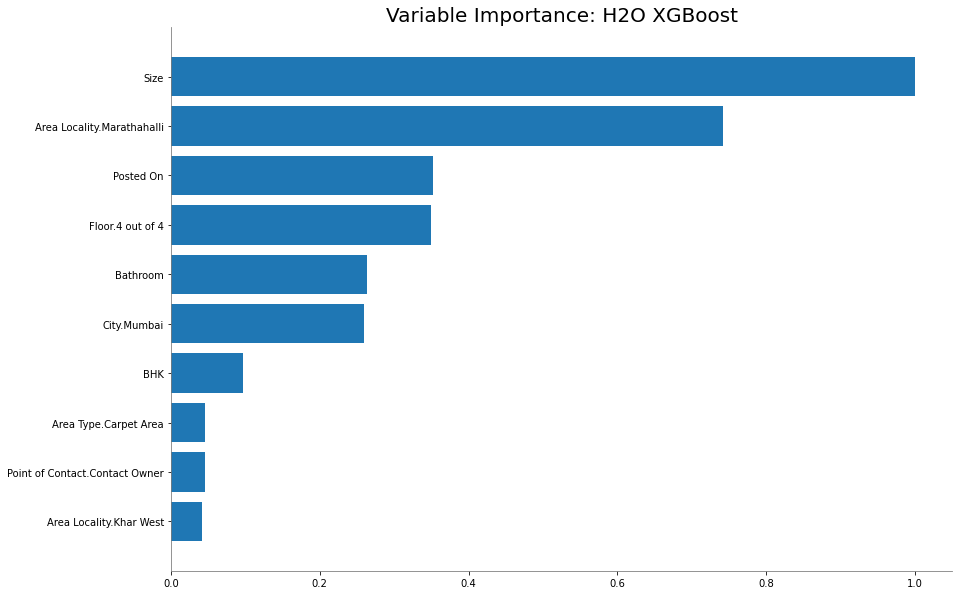

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting the variable importance.
#taken from references
out.varimp_plot()s

**Conclusion**

**Evaluation:**  

From seeing the above scoring history we can understand that our model has less error and deviance aswell and worksperfectly. 

Also while evaluating all the model we can see that present leader model ("**XGBoost_3_AutoML_1_20221104_30504**") has the least amount of **mean residual deviance**, **mse** and **rmse** as well. Which also suggests that our model fuctions perfectly.

The model also gives the most important variables as size,locality,city and bhk suggesting rents dependence on it. Also we know since the model thats involved XGBoost handles Overfitting finely as well. Probably the reason h2o choose it in the first place.

**1. Is the relationship significant?**

Statistical significance means that there is a good chance that we are right in finding that a relationship exists between two variables. We can observe from above that the dependent variable is dependent on variables such as size,city,bhk and locality. We can suggest that the relation ship is significant btw the dependant and independent variables.

**2. Are any model assumptions violated?**

To answer the above question we need to know answer to the below question.

What Are the Assumptions of XGBoost?

1)XGBoost may assume that encoded integer values for each input variable have an ordinal relationship
2)XGBoost assume that your data may not be complete (i.e. it can deal with missing values)

So from above we can say, that every while many variables are real in nature still they can be assumed into finite interval, there by it won't be problem assuming it is ordinal. 

So, no assumptions of XGBoost model are Violated here.

**3. Is there any multicollinearity in the model?**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a  model. SIZE and BHK, SIZE AND BATHROOM & BHK AND BATHROOM have multicollinearity between them.

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

From above correlation we can see that

BHK   Size        0.716145

Size  Bathroom    0.740703

BHK   Bathroom    0.794885

these variables are the one with correlation. and Independent variables have both zero covariance and correlation. By above we can say that bhk and bathroom sizes are dependent on size in general. But we are not goin to remove them since we were asked not to perform feature selection.

**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**Most Importatnt Variables: **

Size	

Area Locality.Marathahalli

Posted On	

Floor.4 out of 4

Bathroom

City.Mumbai	

BHK

are the most importatnt variables for predicitng the obesity levels.

**6. Does the model make sense?**

Yes as we can see that the rent level depending on size,location and bhk etc we can undersatad that the model in sensible.

**7. Does regularization help?**

Regularization helps by ignificantly reducing the variance of the model, without substantial increase in its bias. it is reducing the variance(hence avoiding overfitting), without loosing any important properties in the data.

**8. Which independent variables are significant?**

size, Area Locality,bhk,city and bathroom are the significant variables of all.
Esp Size is the most significant variable.


**9. Which hyperparameters are important?**

max_models and exclude_algos are the most important hyperparameters as they save us a lot of time here. 

**Reference**:

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_model.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb